In [1]:
import pandas  as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss,ClusterCentroids
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense


C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data.shape

(284807, 31)

In [5]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
fraud_case = data[data['Class'] == 1]   # keep only fraud
highest_amount= fraud_case['Amount'].max()
highest_amount_scammed = fraud_case[fraud_case ['Amount'] == highest_amount]
highest_amount_scammed

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
176049,122608.0,-2.00346,-7.159042,-4.050976,1.30958,-2.058102,-0.098621,2.880083,-0.727484,1.460381,...,1.244287,-1.015232,-1.800985,0.657586,-0.435617,-0.894509,-0.397557,0.314262,2125.87,1


In [7]:
fraud_case = data[data['Class'] == 1]   # keep only fraud
lowest_amount= fraud_case['Amount'].min()
lowest_amount_scammed = fraud_case[fraud_case ['Amount'] == lowest_amount]
lowest_amount_scammed.shape

(27, 31)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
y=data['Class']
X=data.drop('Class',axis=1)

In [10]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [11]:
state = np.random.RandomState(42)
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [12]:
data.isnull().values.any()

np.False_

C:\Users\MY PC\AppData\Local\Temp\ipykernel_25668\2043802323.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


Text(0, 0.5, 'Frequency')

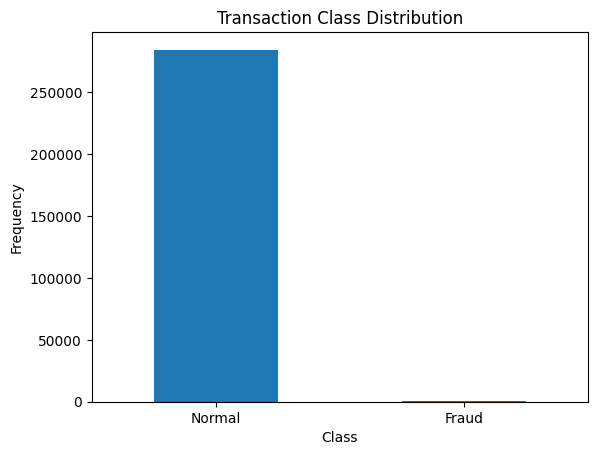

In [13]:
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [14]:
fraud= data[data['Class']==1]
normal= data[data['Class']==1]

In [15]:
print(fraud.shape,normal.shape)

(492, 31) (492, 31)


In [16]:
nm = NearMiss( version=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_train_res,y_train_res=nm.fit_resample(X_train,y_train)
X_train_res.shape,y_train_res.shape

C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


((688, 30), (688,))

In [17]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 199020, 1: 344})
Resampled dataset shape Counter({0: 344, 1: 344})


In [18]:
#Train RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

# Predictions
y_pred = rf.predict(X_test)
y_pred_prob=rf.predict_proba(X_test)[:,1]
print("\n--- Random Forest with SMOTE ---")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))


--- Random Forest with SMOTE ---
              precision    recall  f1-score   support

           0       1.00      0.81      0.90     85295
           1       0.01      0.95      0.02       148

    accuracy                           0.81     85443
   macro avg       0.50      0.88      0.46     85443
weighted avg       1.00      0.81      0.89     85443

ROC-AUC: 0.965182918424609


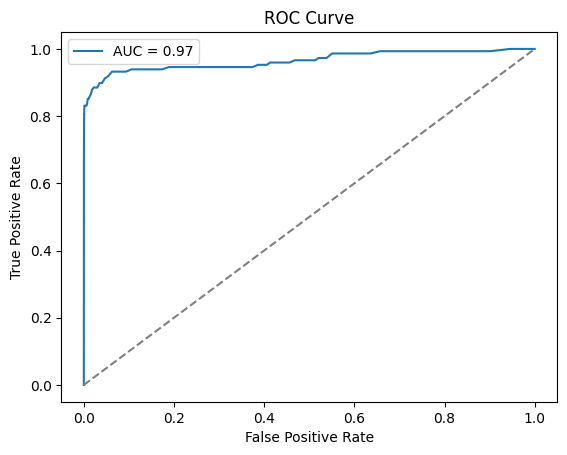

In [19]:
auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray") # random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [20]:
tl = ClusterCentroids()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_train_res,y_train_res=tl.fit_resample(X_train,y_train)
X_train_res.shape,y_train_res.shape

C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


((688, 30), (688,))

In [21]:
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 199020, 1: 344})
Resampled dataset shape Counter({0: 344, 1: 344})


In [22]:
#Train RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

# Predictions
y_pred = rf.predict(X_test)
y_pred_prob=rf.predict_proba(X_test)[:,1]
print("\n--- Random Forest with SMOTE ---")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))


--- Random Forest with SMOTE ---
              precision    recall  f1-score   support

           0       1.00      0.07      0.14     85295
           1       0.00      1.00      0.00       148

    accuracy                           0.07     85443
   macro avg       0.50      0.54      0.07     85443
weighted avg       1.00      0.07      0.14     85443

ROC-AUC: 0.9489413529832078


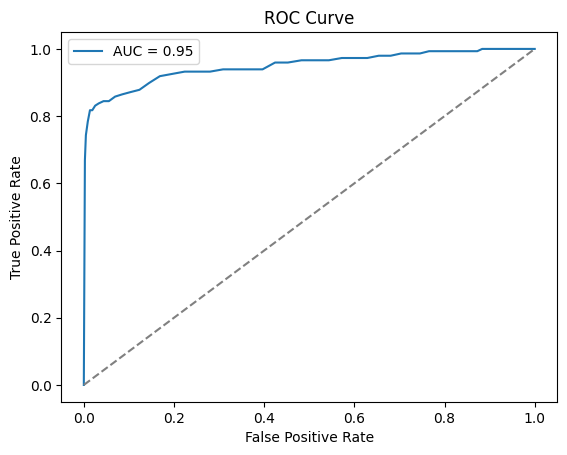

In [23]:
auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray") # random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [24]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_train_res,y_train_res=os.fit_resample(X_train,y_train)

C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [25]:
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 199020, 1: 344})
Resampled dataset shape Counter({0: 199020, 1: 199020})


In [26]:
#Train RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

# Predictions
y_pred = rf.predict(X_test)
y_pred_prob=rf.predict_proba(X_test)[:,1]
print("\n--- Random Forest with SMOTE ---")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))


--- Random Forest with SMOTE ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.74      0.84       148

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.9407835762370026


In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_train_res,y_train_res=smote.fit_resample(X_train,y_train)

C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [28]:
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 199020, 1: 344})
Resampled dataset shape Counter({0: 199020, 1: 199020})


In [29]:
#Train RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

# Predictions
y_pred = rf.predict(X_test)
y_pred_prob=rf.predict_proba(X_test)[:,1]
print("\n--- Random Forest with SMOTE ---")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))


--- Random Forest with SMOTE ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.80      0.84       148

    accuracy                           1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.9493089563565559


In [30]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_train_res,y_train_res=smk.fit_resample(X_train,y_train)

C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [31]:
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 199020, 1: 344})
Resampled dataset shape Counter({0: 198430, 1: 198430})


In [32]:
#Train RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

# Predictions
y_pred = rf.predict(X_test)
y_pred_prob=rf.predict_proba(X_test)[:,1]
print("\n--- Random Forest with SMOTE ---")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))


--- Random Forest with SMOTE ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.80      0.84       148

    accuracy                           1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.9566359914636484


In [33]:
from imblearn.combine import  SMOTEENN
sme = SMOTEENN(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_train_res,y_train_res=sme.fit_resample(X_train,y_train)

C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [34]:
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 199020, 1: 344})
Resampled dataset shape Counter({1: 190538, 0: 182347})


In [35]:
#Train RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

# Predictions
y_pred = rf.predict(X_test)
y_pred_prob=rf.predict_proba(X_test)[:,1]
print("\n--- Random Forest with SMOTE ---")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))


--- Random Forest with SMOTE ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.82      0.82       148

    accuracy                           1.00     85443
   macro avg       0.91      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.9595084547587626


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score

iso_forest = IsolationForest(contamination=0.001, random_state=42)
iso_forest.fit(X_train_scaled)

# Predictions: 1 (normal), -1 (outlier)
y_pred_iso = iso_forest.predict(X_test_scaled)

# Convert to 0 (normal), 1 (fraud/anomaly) for consistency
y_pred_iso = [0 if i==1 else 1 for i in y_pred_iso]

# Anomaly scores (the lower, the more abnormal)
y_scores = -iso_forest.score_samples(X_test_scaled)  # negate to make higher = more anomalous

print(classification_report(y_test, y_pred_iso))
print("ROC-AUC:", roc_auc_score(y_test, y_scores))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.36      0.20      0.26       148

    accuracy                           1.00     85443
   macro avg       0.68      0.60      0.63     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.9431120610029105


In [38]:
y_scores = iso_forest.score_samples(X_test_scaled)
threshold = np.percentile(y_scores, 99.9)  # tune according to contamination
y_pred = (y_scores >= threshold).astype(int)

In [39]:
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_scores))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.0568879389970896


In [ ]:
X_scaled = scaler.fit_transform(X)

X_normal = X_scaled[y == 0]
X_normal

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [ ]:

# -------------------------
# Autoencoder (Sequential)
# -------------------------
input_dim = X_normal.shape[1]

autoencoder = Sequential([
    Dense(16, activation='relu', input_shape=(input_dim,)),
    Dense(8, activation='relu'),      # bottleneck (compressed representation)
    Dense(16, activation='relu'),
    Dense(input_dim, activation='linear')  # reconstruct input
])

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train only on normal transactions
history = autoencoder.fit(X_normal, X_normal,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.2,
                          verbose=1)

# Reconstruction error
reconstructions = autoencoder.predict(X_scaled)
mse = np.mean(np.square(X_scaled - reconstructions), axis=1)

# Threshold based on reconstruction error (95th percentile of normal data)
threshold = np.percentile(mse[y == 0], 95)
print("Threshold:", threshold)

# Predict anomalies
y_pred_ae = (mse > threshold).astype(int)

print(classification_report(y, y_pred_ae, target_names=["Normal", "Fraud"]))
print("ROC-AUC:", roc_auc_score(y, y_pred_ae))

C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.8854 - val_loss: 0.7246
Epoch 2/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.6250 - val_loss: 0.6360
Epoch 3/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5655 - val_loss: 0.5996
Epoch 4/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5359 - val_loss: 0.5813
Epoch 5/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5144 - val_loss: 0.5692
Epoch 6/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5060 - val_loss: 0.5589
Epoch 7/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4931 - val_loss: 0.5484
Epoch 8/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4837 - val_loss: 0.5426
Epoch 9/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4668 - val_loss: 0.5332
Epoch 10/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4589 - val_loss: 0.5268
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step
Threshold: 1.0594287897577475
              precision    recall  f1-score   support

      Norm

In [ ]:
from sklearn.metrics import average_precision_score
print("PR-AUC:", average_precision_score(y, mse))

PR-AUC: 0.3583889624539654


In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier, BalancedBaggingClassifier
from xgboost import XGBClassifier

# Example: EasyEnsemble with XGBoost as base estimator
model = EasyEnsembleClassifier(
    n_estimators=5,
    base_estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss')
)

model.fit(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
# # Compact example (sketch) — requires sklearn, xgboost, tensorflow/keras
# import numpy as np
# import pandas as pd
# from sklearn.ensemble import IsolationForest
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, average_precision_score, roc_auc_score
# from sklearn.preprocessing import StandardScaler
# from xgboost import XGBClassifier
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense

# # X, y are your dataset: X -> features, y -> 0 normal, 1 fraud
# # time-based split recommended; here we use random for brevity
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # 1) Scale
# scaler = StandardScaler()
# X_train_s = scaler.fit_transform(X_train)
# X_test_s = scaler.transform(X_test)

# # 2) Train Autoencoder on (mostly) normal data
# X_ae_train = X_train_s[y_train == 0]  # only normals to learn normal manifold
# input_dim = X_ae_train.shape[1]
# ae = Sequential([
#     Dense(64, activation='relu', input_shape=(input_dim,)),
#     Dense(32, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(input_dim, activation='linear')
# ])
# ae.compile(optimizer='adam', loss='mse')
# ae.fit(X_ae_train, X_ae_train, epochs=20, batch_size=1024, validation_split=0.1, verbose=1)

# # AE scores (MSE)
# recon_train = ae.predict(X_train_s)
# mse_train = np.mean((X_train_s - recon_train)**2, axis=1)
# recon_test = ae.predict(X_test_s)
# mse_test = np.mean((X_test_s - recon_test)**2, axis=1)

# # 3) Isolation Forest (unsupervised)
# iso = IsolationForest(n_estimators=200, contamination=0.001, random_state=42)
# iso.fit(X_train_s)  # fit on whole training (or normals only)
# iso_score_train = -iso.decision_function(X_train_s)  # higher => more anomalous
# iso_score_test = -iso.decision_function(X_test_s)

# # 4) Create stacking features
# # You can either: (A) train supervised model on original features + scores
# # or (B) train a meta-model on the outputs (probabilities) of models.
# X_train_stack = np.hstack([X_train_s, mse_train.reshape(-1,1), iso_score_train.reshape(-1,1)])
# X_test_stack  = np.hstack([X_test_s,  mse_test.reshape(-1,1),  iso_score_test.reshape(-1,1)])

# # 5) Train supervised classifier (XGBoost)
# clf = XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.05, scale_pos_weight=(len(y_train)-sum(y_train))/max(1,sum(y_train)))
# clf.fit(X_train_stack, y_train, eval_metric='auc', early_stopping_rounds=20, eval_set=[(X_test_stack, y_test)], verbose=True)

# # 6) Evaluate
# y_pred = clf.predict(X_test_stack)
# y_proba = clf.predict_proba(X_test_stack)[:,1]
# print(classification_report(y_test, y_pred, target_names=["normal","fraud"]))
# print("PR-AUC:", average_precision_score(y_test, y_proba))
# print("ROC-AUC:", roc_auc_score(y_test, y_proba))